In [1]:
import xarray as xr

In [2]:
pedgefile = '/n/holyscratch01/jacob_lab/jeast/gc-OH-runs-2/gc_2x25_merra2_CH4_v05OH/OutputDir/GEOSChem.LevelEdgeDiags.20190131_0000z.nc4'

In [3]:
concfile = '/n/holyscratch01/jacob_lab/jeast/proj/seasonality/runs/S1-1/OutputDir/GEOSChem.SpeciesConc.20190131_0000z.nc4'

In [4]:
metfile = '/n/holyscratch01/external_repos/GEOS-CHEM/gcgrid/gcdata/ExtData/GEOS_2x2.5/MERRA2/2019/01/MERRA2.20190131.I3.2x25.nc4'

In [5]:
histmetfile = pedgefile.replace('LevelEdgeDiags','StateMet')

In [6]:
pf = xr.open_dataset(pedgefile)
cf = xr.open_dataset(concfile)
mf = xr.open_dataset(metfile)
hf = xr.open_dataset(histmetfile)

In [7]:
pedges = cf.hyai + (cf.hybi * mf.PS/100)

In [8]:
pedges_hf = cf.hyai + (cf.hybi * hf.Met_PSC2WET)

In [9]:
import matplotlib.pyplot as plt

In [10]:
coords=cf.hyai.values/cf.P0.values + cf.hybi.values

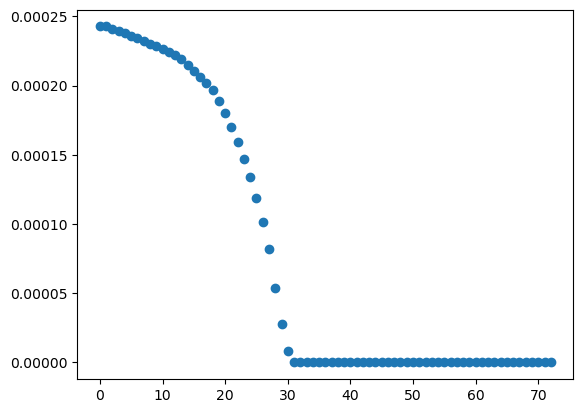

In [29]:
plt.plot(
    (pedges.isel(time=0,lat=45,lon=72).values - pedges_hf.isel(time=0,lat=45,lon=72).values)/pedges_hf.isel(time=0,lat=45,lon=72).values,
    ls='None',marker='o'
)

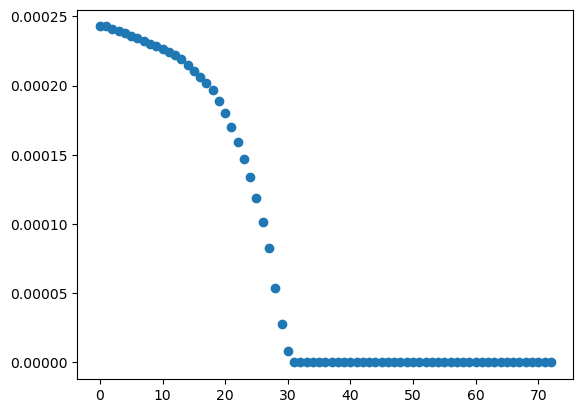

In [31]:
plt.plot(
    (pedges.isel(time=0,lat=45,lon=72).values - pf.Met_PEDGE.isel(time=0,lat=45,lon=72).values)/pf.Met_PEDGE.isel(time=0,lat=45,lon=72).values,
    ls='None',marker='o'
)

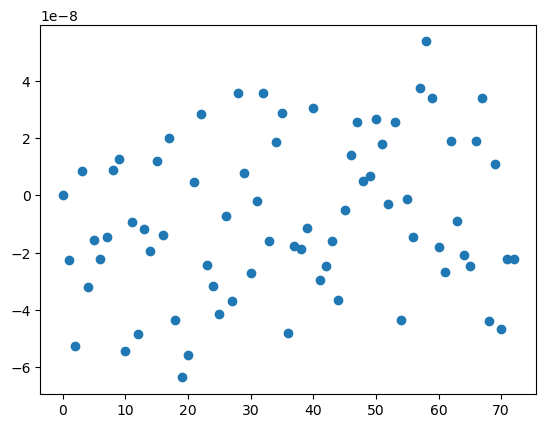

In [35]:
plt.plot(
    (pf.Met_PEDGE.isel(time=0,lat=45,lon=72).values - pedges_hf.isel(time=0,lat=45,lon=72).values)/pedges_hf.isel(time=0,lat=45,lon=72).values,
    ls='None',marker='o'
)

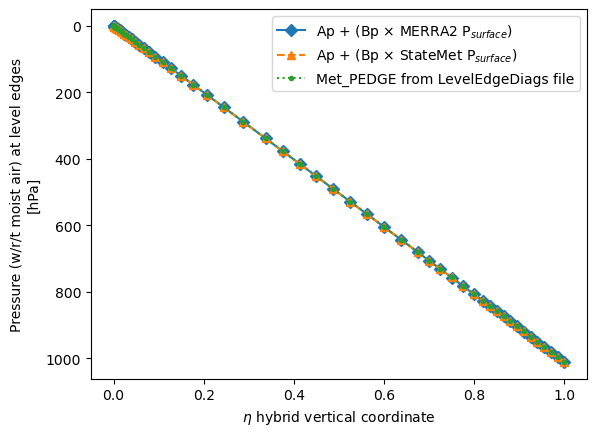

In [11]:
plt.plot(
    cf.hyai.values/cf.P0.values + cf.hybi.values,
    pedges.isel(time=0,lat=45,lon=72),
    label=r'Ap + (Bp $\times$ MERRA2 P$_{surface}$)', marker='D'
)

plt.plot(
    cf.hyai.values/cf.P0.values + cf.hybi.values,
    pedges_hf.isel(time=0,lat=45,lon=72),
    label=r'Ap + (Bp $\times$ StateMet P$_{surface}$)', ls='--', marker='^'
)

plt.plot(
    cf.hyai.values/cf.P0.values + cf.hybi.values,
    pf.Met_PEDGE.isel(time=0,lat=45,lon=72), 
    label='Met_PEDGE from LevelEdgeDiags file', ls=':', marker='.'
)

plt.xlabel('$\eta$ hybrid vertical coordinate')
plt.ylabel(f'{pf.Met_PEDGE.long_name}\n[{pf.Met_PEDGE.units}]')

plt.gca().invert_yaxis()
plt.legend()
plt.savefig('pedges.png',dpi=300,bbox_inches='tight')

In [38]:
vlist = [
    'Met_PSC2WET',
    'Met_PSC2DRY',
    'Met_PS1DRY',
    'Met_PS2DRY',
    'Met_PS1WET',
    'Met_PS2WET'
]

In [39]:
for v in vlist:
    print(v, hf[v].long_name)

Met_PSC2WET Wet interpolated surface pressure
Met_PSC2DRY Dry interpolated surface pressure
Met_PS1DRY Dry surface pressure at dt start
Met_PS2DRY Dry surface pressure at dt end
Met_PS1WET Wet surface pressure at dt start
Met_PS2WET Wet surface pressure at dt end
